In [65]:
import pandas as pd
import numpy as np
import json


%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)


matplotlib.rc('font', family='AppleGothic')  # MacOS
plt.rcParams['axes.unicode_minus'] = False



In [66]:
poss_led = pd.read_csv('data/1.세종시_전유부.csv', encoding='utf-8')
poss_led.head(3)

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,대장구분코드명,건물명,특수지명,블록,로트,동명칭,호명칭,층구분코드명,층번호
0,1,세종특별자치시 반곡동 4121-1002번지,36110,10100,1,4121,1002,집합,세종펠리스,NaN,NaN,NaN,주건축물제1동,616,지상,6
1,2,세종특별자치시 반곡동 4121-1002번지,36110,10100,1,4121,1002,집합,세종펠리스,NaN,NaN,NaN,주건축물제1동,624,지상,6
2,3,세종특별자치시 반곡동 4121-1002번지,36110,10100,1,4121,1002,집합,세종펠리스,NaN,NaN,NaN,주건축물제1동,523,지상,5


In [67]:
poss_led.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   순번       40000 non-null  int64 
 1   대지위치     40000 non-null  object
 2   시군구코드    40000 non-null  int64 
 3   법정동코드    40000 non-null  int64 
 4   대지구분코드   40000 non-null  int64 
 5   번        40000 non-null  int64 
 6   지        40000 non-null  int64 
 7   대장구분코드명  40000 non-null  object
 8   건물명      39924 non-null  object
 9   특수지명     24967 non-null  object
 10  블록       24788 non-null  object
 11  로트       1065 non-null   object
 12  동명칭      39235 non-null  object
 13  호명칭      40000 non-null  object
 14  층구분코드명   40000 non-null  object
 15  층번호      40000 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.9+ MB


In [68]:
poss_led[poss_led['층구분코드명'] != '지상']

,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,대장구분코드명,건물명,특수지명,블록,로트,동명칭,호명칭,층구분코드명,층번호
809,810,세종특별자치시 반곡동 블록 4-1생활권지구 L2블록블록,36110,10100,3,0,0,집합,수루배마을 2단지,4-1생활권,L2블록,NaN,T214동,B101,지하,1
820,821,세종특별자치시 반곡동 블록 4-1생활권지구 L2블록블록,36110,10100,3,0,0,집합,수루배마을 2단지,4-1생활권,L2블록,NaN,208동,B102,지하,1
821,822,세종특별자치시 반곡동 블록 4-1생활권지구 L2블록블록,36110,10100,3,0,0,집합,수루배마을 2단지,4-1생활권,L2블록,NaN,상가B동,B106,지하,1
831,832,세종특별자치시 반곡동 블록 4-1생활권지구 L2블록블록,36110,10100,3,0,0,집합,수루배마을 2단지,4-1생활권,L2블록,NaN,상가B동,B108,지하,1
854,855,세종특별자치시 반곡동 블록 4-1생활권지구 L2블록블록,36110,10100,3,0,0,집합,수루배마을 2단지,4-1생활권,L2블록,NaN,상가B동,B107,지하,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39819,39820,세종특별자치시 나성동 730번지,36110,10700,1,730,0,집합,에스알파크시티,NaN,NaN,NaN,에스알파크시티,B105,지하,1
39822,39823,세종특별자치시 나성동 730번지,36110,10700,1,730,0,집합,에스알파크시티,NaN,NaN,NaN,에스알파크시티,B109,지하,1
39834,39835,세종특별자치시 나성동 730번지,36110,10700,1,730,0,집합,에스알파크시티,NaN,NaN,NaN,에스알파크시티,B104,지하,1
39900,39901,세종특별자치시 나성동 730번지,36110,10700,1,730,0,집합,에스알파크시티,NaN,NaN,NaN,에스알파크시티,B107,지하,1


In [69]:
title_table = pd.read_csv('data/2.세종시_표제부.csv')
title_table.head(3)


,순번,대지위치,시군구코드,법정동코드,대지구분코드,번,지,대장구분코드명,건물명,동명칭,연면적(㎡),구조코드명,주용도코드명,세대수(세대),사용승인일,Unnamed: 15
0,1,세종특별자치시 반곡동 146-75번지,36110,10100,1,146,75,일반,NaN,NaN,135.24,벽돌구조,단독주택,0,1977.0,NaN
1,2,세종특별자치시 반곡동 146-79번지,36110,10100,1,146,79,일반,NaN,1동,576,강파이프구조,동.식물관련시설,0,1999.0,NaN
2,3,세종특별자치시 반곡동 146-79번지,36110,10100,1,146,79,일반,NaN,2동,336,강파이프구조,동.식물관련시설,0,20041223.0,NaN


In [70]:
real_price = pd.read_csv('data/3.세종시_아파트(매매)_실거래가.csv')
real_price.head(3)

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
0,201701,19,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,"23,000",11,2015,NaN
1,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3,2015,NaN
2,201701,14,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,"32,500",21,2015,NaN


In [71]:
real_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      18409 non-null  int64  
 1   계약일       18409 non-null  int64  
 2   시군구       18409 non-null  object 
 3   본번        18409 non-null  object 
 4   부번        18409 non-null  int64  
 5   단지명       18409 non-null  object 
 6   전용면적(㎡)   18409 non-null  float64
 7   거래금액(만원)  18409 non-null  object 
 8   층         18409 non-null  int64  
 9   건축년도      18409 non-null  int64  
 10  해제사유발생일   490 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.5+ MB


In [72]:
land_price = pd.read_csv('data/12.세종시_토지(매매)_실거래가.csv')
land_price.head(3)


,시군구,지목,용도지역,도로조건,계약년월,계약일,계약면적(㎡),거래금액(만원),지분구분,해제사유발생일
0,세종특별자치시 전동면 보덕리,임야,농림지역,-,201801,1,331.0,"1,050",지분,NaN
1,세종특별자치시 전동면 봉대리,임야,농림지역,-,201801,1,330.0,"1,190",지분,NaN
2,세종특별자치시 전동면 송정리,임야,농림지역,-,201801,1,331.0,"1,290",지분,NaN


In [73]:
land_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35677 entries, 0 to 35676
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       35677 non-null  object 
 1   지목        35677 non-null  object 
 2   용도지역      35653 non-null  object 
 3   도로조건      35677 non-null  object 
 4   계약년월      35677 non-null  int64  
 5   계약일       35677 non-null  int64  
 6   계약면적(㎡)   35677 non-null  float64
 7   거래금액(만원)  35677 non-null  object 
 8   지분구분      35677 non-null  object 
 9   해제사유발생일   681 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.7+ MB


In [74]:
office_price = pd.read_csv('data/10.세종시_오피스텔(전월세)_실거래가.csv')
office_price.head(3)


,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도
0,세종특별자치시 어진동,0,0,2차푸르지오시티,전세,21.92,201701,1,"7,500",0,9,2014
1,세종특별자치시 어진동,0,0,푸르지오시티,월세,23.74,201701,2,300,30,13,2014
2,세종특별자치시 어진동,0,0,호수의아침,전세,23.57,201701,3,"6,000",0,11,2014


In [75]:
office_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      1274 non-null   object 
 1   본번       1274 non-null   int64  
 2   부번       1274 non-null   int64  
 3   단지명      1274 non-null   object 
 4   전월세구분    1274 non-null   object 
 5   전용면적(㎡)  1274 non-null   float64
 6   계약년월     1274 non-null   int64  
 7   계약일      1274 non-null   int64  
 8   보증금(만원)  1274 non-null   object 
 9   월세(만원)   1274 non-null   int64  
 10  층        1274 non-null   int64  
 11  건축년도     1274 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 119.6+ KB


In [76]:
cml_info = pd.read_csv('data/14.세종시_상권정보.csv')
cml_info.head(3)

,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,lon,lat
0,D,소매,D21,철물/난방/건설자재소매,D21A06,철물/건설자재소매,G47511,철물 및 난방용구 소매업,3611025000,조치원읍,"세종특별자치시 조치원읍 새내로 90-1, (정리)",127.298552,36.599920
1,D,소매,D21,철물/난방/건설자재소매,D21A02,보일러/냉난방용품,G47511,철물 및 난방용구 소매업,3611037000,전의면,"세종특별자치시 전의면 왕의물로 40, (동교리)",127.204298,36.682526
2,F,생활서비스,F15,주택수리,F15A03,배관난방보일러,F42201,배관 및 냉·난방 공사업,3611036000,연서면,"세종특별자치시 연서면 당산로 322, (봉암리)",127.280990,36.560523


In [77]:
cml_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10773 entries, 0 to 10772
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상권업종대분류코드  10773 non-null  object 
 1   상권업종대분류명   10773 non-null  object 
 2   상권업종중분류코드  10773 non-null  object 
 3   상권업종중분류명   10773 non-null  object 
 4   상권업종소분류코드  10773 non-null  object 
 5   상권업종소분류명   10773 non-null  object 
 6   표준산업분류코드   10169 non-null  object 
 7   표준산업분류명    10169 non-null  object 
 8   행정동코드      10773 non-null  int64  
 9   행정동명       10773 non-null  object 
 10  도로명주소      10773 non-null  object 
 11  lon        10773 non-null  float64
 12  lat        10773 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [78]:
cml_code = pd.read_csv('data/15.세종시_상권정보_업종코드.csv')
cml_code.head()

,대분류코드,대분류명,중분류코드,중분류명,소분류코드,소분류명
0,Q,음식,Q05,닭/오리요리,Q05A01,삼계탕전문
1,Q,음식,Q05,닭/오리요리,Q05A02,닭갈비전문
2,Q,음식,Q01,한식,Q01A16,보리밥전문
3,Q,음식,Q05,닭/오리요리,Q05A09,오리고기전문
4,Q,음식,Q05,닭/오리요리,Q05A07,토종닭전문


In [79]:
appr_price = pd.read_csv('data/18.세종시_공시지가(2017~2020).csv')
appr_price.tail(3)

,id,법정동코드,지번본번부번,법정동명,특수지구분코드,특수지구분명,지번,기준년도,기준월,공시지가,공시일자,표준지여부,데이터기준일자
725436,4739432,3611039024,201830007,세종특별자치시 소정면 고등리,2,산,183_7,2020,1,16100,2020-05-29,N,2020-09-26
725437,4739463,3611039024,201840001,세종특별자치시 소정면 고등리,2,산,184_1,2020,1,11900,2020-05-29,N,2020-09-26
725438,4739482,3611039024,201840006,세종특별자치시 소정면 고등리,2,산,184_6,2020,1,24000,2020-05-29,N,2020-09-26


In [80]:
mov_in = pd.read_csv('data/20.세종시_전입자수.csv')
mov_in.head(3)


,년월,전입자수,세종전입행정동,전출시,전출시군구,전출읍면동
0,201701,1,조치원읍,강원도,강릉시,교1동
1,201701,6,조치원읍,강원도,동해시,천곡동
2,201701,14,조치원읍,강원도,속초시,교동


In [81]:
mov_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108082 entries, 0 to 108081
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   년월       108082 non-null  int64 
 1   전입자수     108082 non-null  int64 
 2   세종전입행정동  108082 non-null  object
 3   전출시      108082 non-null  object
 4   전출시군구    108082 non-null  object
 5   전출읍면동    108082 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.9+ MB


In [82]:
mov_in[mov_in['전출시']!='세종특별자치시'].sort_values(by=['전입자수'], ascending=False)

,년월,전입자수,세종전입행정동,전출시,전출시군구,전출읍면동
99034,202010,1365,도담동,충청북도,청주시청원구,오창읍
101527,202011,1330,도담동,충청북도,청주시청원구,오창읍
5928,201703,1296,보람동,대전광역시,유성구,구즉동
10921,201706,1085,한솔동,충청북도,청주시청원구,오창읍
6112,201703,1050,보람동,충청북도,청주시청원구,오창읍
...,...,...,...,...,...,...
78175,202001,1,새롬동,대전광역시,서구,도마2동
33532,201805,1,장군면,충청북도,충주시,용산동
33534,201805,1,연서면,경기도,고양시 덕양구,화정1동
78164,202001,1,새롬동,대전광역시,동구,용전동


In [83]:
mov_in[mov_in['전출시']!='세종특별자치시'].sort_values(by=['전입자수'], ascending=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98249 entries, 99034 to 0
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   년월       98249 non-null  int64 
 1   전입자수     98249 non-null  int64 
 2   세종전입행정동  98249 non-null  object
 3   전출시      98249 non-null  object
 4   전출시군구    98249 non-null  object
 5   전출읍면동    98249 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.2+ MB


In [84]:
mov_out = pd.read_csv('data/21.세종시_전출자수.csv')

In [85]:
mov_out[mov_out['전입시']!='세종특별자치시'].sort_values(by=['전출자수'], ascending=False)

,년월,전출자수,세종전출행정동,전입시,전입시군구,전입읍면동
66219,202006,3822,조치원읍,충청북도,청주시흥덕구,오송읍
68104,202007,1064,조치원읍,충청북도,청주시흥덕구,오송읍
1564,201702,630,조치원읍,충청북도,청주시청원구,오창읍
75441,202011,630,조치원읍,충청북도,청주시흥덕구,오송읍
69953,202008,574,조치원읍,충청북도,청주시흥덕구,오송읍
...,...,...,...,...,...,...
57979,202002,1,장군면,대전광역시,대덕구,중리동
57978,202002,1,장군면,대구광역시,북구,산격2동
17515,201801,1,보람동,경기도,수원시 팔달구,우만2동
31136,201811,1,연기면,서울특별시,강서구,화곡본동


In [86]:
mov_out.describe()

,년월,전출자수
count,80992.000000,80992.000000
mean,201878.315056,18.881025
std,114.652178,140.804576
min,201701.000000,1.000000
25%,201803.000000,1.000000
50%,201904.000000,4.000000
75%,202003.000000,12.000000
max,202101.000000,7335.000000


array([[<AxesSubplot:title={'center':'년월'}>,
        <AxesSubplot:title={'center':'전출자수'}>]], dtype=object)

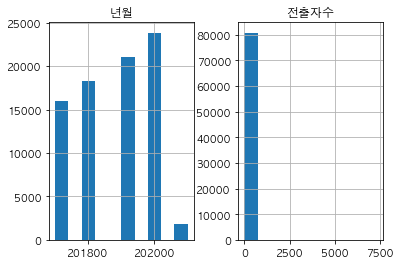

In [87]:
mov_out.hist()

In [88]:
age = pd.read_csv('data/22.세종시_연령별_인구현황.csv')

In [89]:
age.head(5)

,읍면동,201701_남자(총_거주자_수),201701_남자(연령구간인구수),201701_남자(0~9세),201701_남자(10~19세),201701_남자(20~29세),201701_남자(30~39세),201701_남자(40~49세),201701_남자(50~59세),201701_남자(60~69세),...,202012_여자(10~19세),202012_여자(20~29세),202012_여자(30~39세),202012_여자(40~49세),202012_여자(50~59세),202012_여자(60~69세),202012_여자(70~79세),202012_여자(80~89세),202012_여자(90~99세),202012_여자(100세_이상)
0,세종특별자치시,121937,121937,17864,13917,13463,22372,23665,15288,8922,...,21252,18385,31411,33519,21592,15113,7736,4672,915,22
1,조치원읍,23529,23529,2525,2473,3461,3783,4126,3393,2131,...,2050,2811,2436,3186,3110,2676,1725,930,162,7
2,연기면,1463,1463,56,93,220,176,263,296,203,...,54,156,104,109,210,221,138,102,23,1
3,연동면,1828,1828,87,123,210,228,247,368,318,...,63,112,116,123,245,307,224,212,45,0
4,부강면,3554,3554,235,287,472,505,588,650,396,...,170,255,274,314,457,511,353,251,32,1


In [90]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 1249 entries, 읍면동 to 202012_여자(100세_이상)
dtypes: int64(1248), object(1)
memory usage: 205.0+ KB


In [91]:
consum = pd.read_csv('data/25.세종시_가구_월평균_소비지출액.csv')

In [92]:
consum

,중분류,소분류,50만원 미만,50~100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600만원 이상
0,전체,소계,4.5,13.8,23.3,24.7,18.4,10.3,3.7,1.3
1,읍·면·동별,조치원읍,10.1,25.9,26.4,18.0,11.4,5.4,2.6,0.2
2,읍·면·동별,면지역,9.8,25.0,33.5,21.6,6.2,2.6,0.9,0.5
3,읍·면·동별,동지역,1.1,6.5,19.1,27.7,24.4,14.3,5.0,1.8
4,성별,남자,2.7,10.0,23.0,27.1,19.9,11.5,4.5,1.5
5,성별,여자,10.1,25.3,24.4,17.5,13.8,6.8,1.5,0.6
6,거주기간별,출범이전,8.7,23.4,27.4,20.1,12.0,6.2,2.1,0.0
7,거주기간별,출범이후,2.8,10.0,21.7,26.5,20.9,12.0,4.4,1.8
8,연령별,13~19세,37.6,42.0,20.4,0.0,0.0,0.0,0.0,0.0
9,연령별,20~29세,12.0,35.0,41.5,7.8,3.7,0.0,0.0,0.0


In [93]:
consum_age = consum[consum['중분류']=='연령별']


In [94]:
consum_age = consum_age.drop('중분류', axis=1)
consum_age =consum_age.set_index('소분류')

,50만원 미만,50~100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600만원 이상
소분류,,,,,,,,
13~19세,37.6,42.0,20.4,0.0,0.0,0.0,0.0,0.0
20~29세,12.0,35.0,41.5,7.8,3.7,0.0,0.0,0.0
30~39세,0.5,5.0,21.6,35.5,22.0,12.0,2.2,1.1
40~49세,0.3,3.7,13.4,29.7,27.4,16.2,7.4,1.9
50~59세,1.1,7.6,20.9,25.5,23.4,14.1,5.1,2.3
60세 이상,12.8,31.6,31.8,14.0,5.5,2.6,1.3,0.4
65세 이상,17.6,39.5,27.0,11.1,2.8,1.4,0.6,0.0


array([[<AxesSubplot:title={'center':'50만원 미만'}>,
        <AxesSubplot:title={'center':'50~100만원 미만'}>,
        <AxesSubplot:title={'center':'100~200만원 미만'}>],
       [<AxesSubplot:title={'center':'200~300만원 미만'}>,
        <AxesSubplot:title={'center':'300~400만원 미만'}>,
        <AxesSubplot:title={'center':'400~500만원 미만'}>],
       [<AxesSubplot:title={'center':'500~600만원 미만'}>,
        <AxesSubplot:title={'center':'600만원 이상'}>, <AxesSubplot:>]],
      dtype=object)

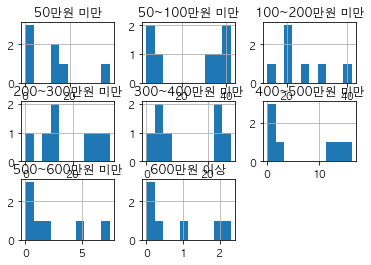

In [113]:
consum_edu = consum[consum['중분류']=='교육정도별']
consum_edu = consum_edu.drop(columns=['중분류']).rename(columns={'소분류':'교육정도별'})

consum_edu = consum_edu.set_index('교육정도별')
consum_edu

,50만원 미만,50~100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600만원 이상
교육정도별,,,,,,,,
초졸이하,22.8,44.5,21.9,5.5,4.9,0.4,0.0,0.0
중졸,5.0,28.4,37.8,21.2,3.9,2.1,1.6,0.0
고졸,2.2,11.2,34.1,27.1,16.5,6.9,1.5,0.5
대학이상,2.7,9.4,19.2,26.8,21.8,13.3,5.1,1.8


In [115]:
def consumType(column_name):
    df = consum[consum['중분류']==column_name]
    df = df.drop(columns=['중분류']).rename(columns={'소분류':column_name})
    df = df.set_index(column_name)
    return df


In [116]:
consum_house_type = consumType('주거점유형태별')
consum_house_type

,50만원 미만,50~100만원 미만,100~200만원 미만,200~300만원 미만,300~400만원 미만,400~500만원 미만,500~600만원 미만,600만원 이상
주거점유형태별,,,,,,,,
자가집,3.7,11.5,20.8,25.9,21.0,11.6,4.4,1.2
전세,2.8,9.1,20.3,31.0,22.4,9.4,3.1,2.0
월세/기타,7.7,22.6,31.5,17.2,9.3,8.1,2.7,0.9
